In [3]:
import os
import shutil
import random

# base directory
base_dir = 'C:/Users/jalad/Downloads/mldl_data'

# directories for training and test data
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

# Percentage of images for training and testing
train_percentage = 0.8
test_percentage = 0.2

# base directory if it doesn't exist
if not os.path.exists(base_dir):
    os.makedirs(base_dir)

# Creating the directories for training and test data
os.makedirs(os.path.join(train_dir, 'human_generated'), exist_ok=True)
os.makedirs(os.path.join(train_dir, 'ai_generated'), exist_ok=True)
os.makedirs(os.path.join(test_dir, 'human_generated'), exist_ok=True)
os.makedirs(os.path.join(test_dir, 'ai_generated'), exist_ok=True)

# Copy the human-generated art images to the respective directories
human_generated_dir = 'C:/Users/jalad/Downloads/mldl_data/RealArt/RealArt'
human_generated_files = os.listdir(human_generated_dir)
random.shuffle(human_generated_files)  # Shuffle the files for random distribution

num_train = int(len(human_generated_files) * train_percentage)

for i, filename in enumerate(human_generated_files):
    source_path = os.path.join(human_generated_dir, filename)
    if i < num_train:
        dest_path = os.path.join(train_dir, 'human_generated', filename)
    else:
        dest_path = os.path.join(test_dir, 'human_generated', filename)
    shutil.copy(source_path, dest_path)

# Copy the AI-generated art images to the respective directories
ai_generated_dir = 'C:/Users/jalad/Downloads/mldl_data/AiArtData/AiArtData'
ai_generated_files = os.listdir(ai_generated_dir)
random.shuffle(ai_generated_files)  # Shuffle the files for random distribution

num_train = int(len(ai_generated_files) * train_percentage)

for i, filename in enumerate(ai_generated_files):
    source_path = os.path.join(ai_generated_dir, filename)
    if i < num_train:
        dest_path = os.path.join(train_dir, 'ai_generated', filename)
    else:
        dest_path = os.path.join(test_dir, 'ai_generated', filename)
    shutil.copy(source_path, dest_path)

In [4]:
import os
from PIL import Image

#  base directory
base_dir = 'C:/Users/jalad/Downloads/mldl_data'

# directories for training and test data
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

# Function to check image data types
def check_image_types(directory):
    file_types = {}
    total_count = 0
    for root, _, files in os.walk(directory):
        for file in files:
            try:
                with Image.open(os.path.join(root, file)) as img:
                    mode = img.mode
                    file_types[mode] = file_types.get(mode, 0) + 1
                    total_count += 1
            except Exception as e:
                print(f"Error opening file {file}: {e}")
    return file_types, total_count

# Checing data types and count for training set
print("Training Set:")
human_generated_train_dir = os.path.join(train_dir, 'human_generated')
ai_generated_train_dir = os.path.join(train_dir, 'ai_generated')

print("Human Generated:")
human_train_file_types, human_train_count = check_image_types(human_generated_train_dir)
print(human_train_file_types)
print(f"Number of images: {human_train_count}")

print("AI Generated:")
ai_train_file_types, ai_train_count = check_image_types(ai_generated_train_dir)
print(ai_train_file_types)
print(f"Number of images: {ai_train_count}")

# Checking data types and count for test set
print("\nTest Set:")
human_generated_test_dir = os.path.join(test_dir, 'human_generated')
ai_generated_test_dir = os.path.join(test_dir, 'ai_generated')

print("Human Generated:")
human_test_file_types, human_test_count = check_image_types(human_generated_test_dir)
print(human_test_file_types)
print(f"Number of images: {human_test_count}")

print("AI Generated:")
ai_test_file_types, ai_test_count = check_image_types(ai_generated_test_dir)
print(ai_test_file_types)
print(f"Number of images: {ai_test_count}")

# Calculating total count of images
total_count = human_train_count + ai_train_count + human_test_count + ai_test_count
print("\nTotal number of images:", total_count)


Training Set:
Human Generated:
{'RGB': 323, 'P': 9, 'L': 6, 'RGBA': 10}
Number of images: 348
AI Generated:
{'RGB': 394, 'P': 12, 'RGBA': 25}
Number of images: 431

Test Set:
Human Generated:
{'RGB': 84, 'RGBA': 4}
Number of images: 88
AI Generated:
{'RGB': 95, 'RGBA': 10, 'P': 2, 'L': 1}
Number of images: 108

Total number of images: 975


In [5]:
import os
from PIL import Image

# Defining the base directory
base_dir = 'C:/Users/jalad/Downloads/mldl_data'

# Defining the directories for training and test data
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

# Function to convert images to RGB format
def convert_to_rgb(directory):
    for root, _, files in os.walk(directory):
        for file in files:
            image_path = os.path.join(root, file)
            try:
                with Image.open(image_path) as img:
                    if img.mode != 'RGB':
                        img = img.convert('RGB')
                        img.save(image_path)
            except Exception as e:
                print(f"Error converting file {file}: {e}")

# Converting images to RGB format for training set
print("Converting training set images to RGB format")
convert_to_rgb(os.path.join(train_dir, 'human_generated'))
convert_to_rgb(os.path.join(train_dir, 'ai_generated'))

# Converting images to RGB format for test set
print("Converting test set images to RGB format")
convert_to_rgb(os.path.join(test_dir, 'human_generated'))
convert_to_rgb(os.path.join(test_dir, 'ai_generated'))

# to count the number of images in a directory
def count_images(directory):
    count = 0
    for root, _, files in os.walk(directory):
        for file in files:
            count += 1
    return count

#  number of images in the training set
human_generated_train_dir = os.path.join(train_dir, 'human_generated')
ai_generated_train_dir = os.path.join(train_dir, 'ai_generated')

human_train_count = count_images(human_generated_train_dir)
ai_train_count = count_images(ai_generated_train_dir)
train_count = human_train_count + ai_train_count
print(f"Number of images in the training set: {train_count}")

#  number of images in the test set
human_generated_test_dir = os.path.join(test_dir, 'human_generated')
ai_generated_test_dir = os.path.join(test_dir, 'ai_generated')

human_test_count = count_images(human_generated_test_dir)
ai_test_count = count_images(ai_generated_test_dir)
test_count = human_test_count + ai_test_count
print(f"Number of images in the test set: {test_count}")

# Calculating the total number of images
total_count = train_count + test_count
print(f"\nTotal number of images: {total_count}")

Converting training set images to RGB format...


C:\Users\jalad\AppData\Local\Programs\Python\Python310\lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Converting test set images to RGB format...
Number of images in the training set: 779
Number of images in the test set: 196

Total number of images: 975


<Figure size 1500x300 with 0 Axes>

In [1]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import InceptionV3
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, MaxPooling2D
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
from keras.losses import BinaryCrossentropy
import tensorflow as tf
from collections import Counter

# Defining the base directory
base_dir = 'C:/Users/jalad/Downloads/mldl_data'

# Defining the directories for training and test data
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

# Defining the image data generators with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Loading the training and test data
train_generator = train_datagen.flow_from_directory(
    train_dir, # This directory containing the train images
    target_size=(299, 299), # resizing the images
    batch_size=32, # no of images per batch
    class_mode='binary', # binary classification mode
    shuffle=True) # shuffle the data after each epoch

test_generator = test_datagen.flow_from_directory(
    test_dir, # Directory containing the testing images
    target_size=(299, 299), # resizing the images to 299 * 299
    batch_size=32, # Number of images per batch
    class_mode='binary', # binary classification mode
    shuffle=False) # 

#  Class weights to handle class imbalance
class_counts = Counter(train_generator.classes)
total_samples = sum(class_counts.values())
class_weights = {0: total_samples / (2 * class_counts[0]), 1: total_samples / (2 * class_counts[1])}


Found 775 images belonging to 2 classes.
Found 195 images belonging to 2 classes.


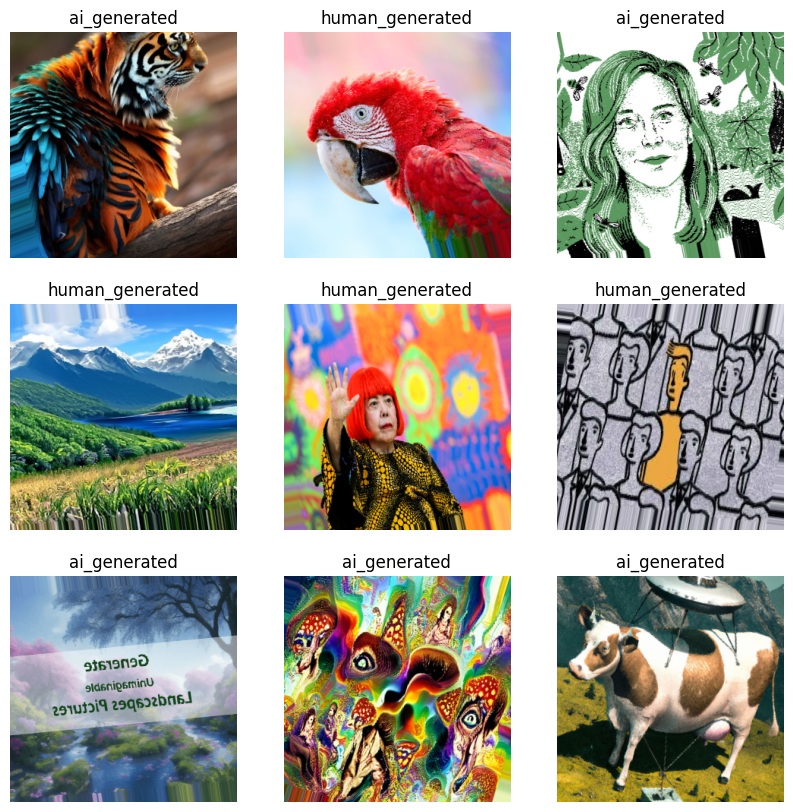

In [2]:
import matplotlib.pyplot as plt

# a batch of images from the training generator
sample_images, sample_labels = next(train_generator)

# Defining the class labels
class_labels = train_generator.class_indices

# Reverse the class label mapping for better interpretation
class_labels = {v: k for k, v in class_labels.items()}

# Plotting the images
plt.figure(figsize=(10, 10))
for i in range(9):  # Displaying 9 images
    plt.subplot(3, 3, i + 1)
    plt.imshow(sample_images[i])
    plt.title(class_labels[int(sample_labels[i])])
    plt.axis('off')
plt.show()


In [ ]:
#this is InceptionV3 model

In [2]:
# Loading the InceptionV3 model with pre-trained weights
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Adding a max pooling layer, global average pooling layer, dropout, and dense layers
x_m = base_model.output
x_m = MaxPooling2D(pool_size=(2, 2))(x_m) #Adding a max pooling layer to reduce spatial dimensions
x_m= GlobalAveragePooling2D()(x_m) # Adding a global average pooling layer to reduce the dimensionality
x_m = Dropout(0.5)(x_m) #  a dropout layer to prevent overfitting
x_m = Dense(512, activation='relu', kernel_regularizer=l2(0.001))(x_m) # dense layer with regularization
predictions = Dense(1, activation='sigmoid')(x_m) # Final output layer with sigmoid activation for binary classification


# Creating the model
model = Model(inputs=base_model.input, outputs=predictions)

# Unfreeze the top layers for fine-tuning
for layer in model.layers[:249]: #  Freeze layers up to layer 249
    layer.trainable = False
for layer in model.layers[249:]: # Unfreeze layers starting from layer 250
    layer.trainable = True

# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss=BinaryCrossentropy(), metrics=['accuracy'])

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10) #early stopping to prevent overfitting
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-7) 

In [3]:
# Train the model
history = model.fit_generator(
    train_generator,   # Training data generator
    steps_per_epoch=train_generator.samples // train_generator.batch_size, # Number of steps per epoch
    epochs=50, # Number of epochs
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
    callbacks=[early_stop, reduce_lr],
    class_weight=class_weights)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate_generator(test_generator)
print(f'Test accuracy: {test_acc:.4f}')

C:\Users\jalad\AppData\Local\Temp\ipykernel_39668\2407222466.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/50


24/24 [==============================] - 48s 2s/step - loss: 1.4286 - accuracy: 0.6729 - val_loss: 1.4933 - val_accuracy: 0.6875 - lr: 1.0000e-04
Epoch 2/50
24/24 [==============================] - 40s 2s/step - loss: 1.1691 - accuracy: 0.8466 - val_loss: 1.5244 - val_accuracy: 0.7292 - lr: 1.0000e-04
Epoch 3/50
24/24 [==============================] - 42s 2s/step - loss: 1.0227 - accuracy: 0.9112 - val_loss: 1.3882 - val_accuracy: 0.7865 - lr: 1.0000e-04
Epoch 4/50
24/24 [==============================] - 42s 2s/step - loss: 0.9315 - accuracy: 0.9542 - val_loss: 1.4125 - val_accuracy: 0.7604 - lr: 1.0000e-04
Epoch 5/50
24/24 [==============================] - 38s 2s/step - loss: 0.8667 - accuracy: 0.9798 - val_loss: 1.4058 - val_accuracy: 0.8125 - lr: 1.0000e-04
Epoch 6/50
24/24 [==============================] - 38s 2s/step - loss: 0.8679 - accuracy: 0.9664 - val_loss: 1.5139 - val_accuracy: 0.7708 - lr: 1.0000e-04
Epoch 7/50
24/24 [==============================] - 38s 

C:\Users\jalad\AppData\Local\Temp\ipykernel_39668\2407222466.py:12: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc = model.evaluate_generator(test_generator)


Test accuracy: 0.8256


In [4]:

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import itertools

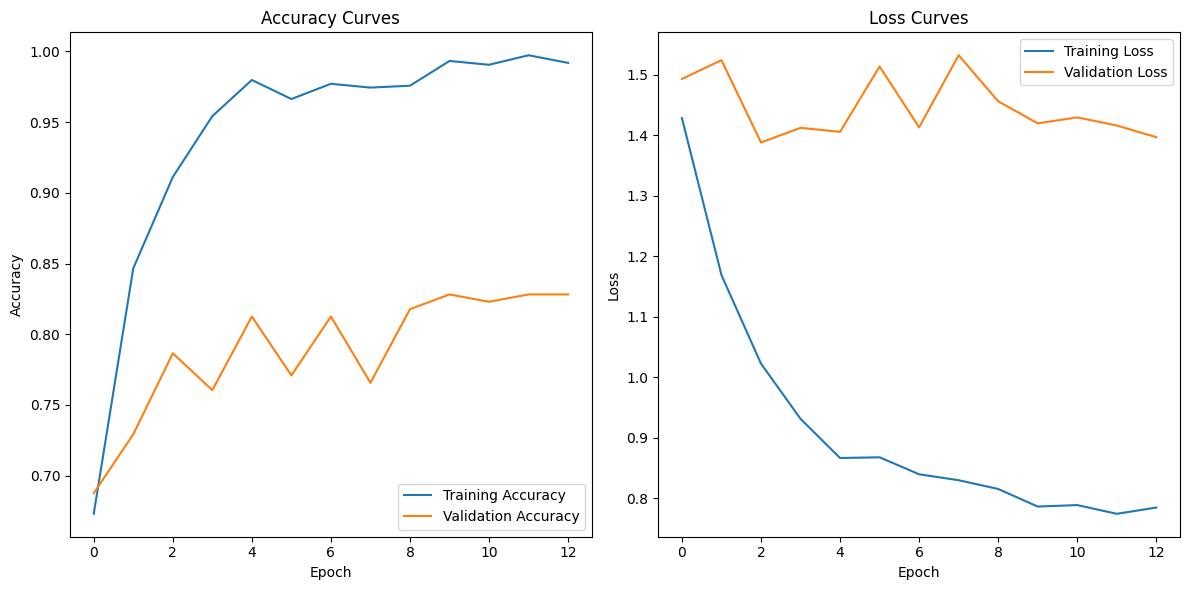

In [5]:

# Plot the accuracy and loss curves
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\jalad\AppData\Local\Temp\ipykernel_39668\687208399.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model.predict_generator(test_generator)


Confusion Matrix:
[[94 14]
 [20 67]]


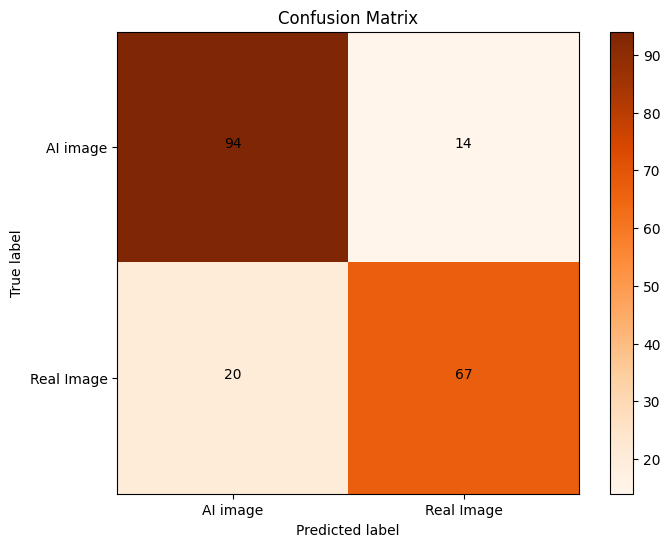

In [6]:
# Computing and printing the confusion matrix
y_pred = model.predict_generator(test_generator)
y_pred = np.round(y_pred)
cm = confusion_matrix(test_generator.classes, y_pred.flatten())
print('Confusion Matrix:')
print(cm)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, cmap=plt.cm.Oranges, interpolation='nearest')
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks([0, 1], ['AI image', 'Real Image'])
plt.yticks([0, 1], ['AI image', 'Real Image'])
plt.title('Confusion Matrix')
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment="center", color="black" if cm[i, j] > thresh else "black")
plt.show()

In [7]:
# the classification report
report = classification_report(test_generator.classes, y_pred.flatten())
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.85       108
           1       0.83      0.77      0.80        87

    accuracy                           0.83       195
   macro avg       0.83      0.82      0.82       195
weighted avg       0.83      0.83      0.82       195



In [ ]:
# reference of the model part https://medium.com/@armielynobinguar/simple-implementation-of-inceptionv3-for-image-classification-using-tensorflow-and-keras-6557feb9bf53
# remainig code from the previous projects like data augmentaion
# checking datatypes, counting images and creating folders - took reference from chatgpt